In [1]:

#Getting qoutes for H4 and D1
import pandas as pd
col_names=['Date', 'Time','Open','High','Low','Close','Tick_Vol']
df = pd.read_csv ('~/anaconda3/envs/FR/EURUSD1440.csv',names=col_names)
df['Date'] = df['Date']+' '+df['Time']
df['DateTime']=pd.to_datetime(df.pop('Date'))
D1 = df[-11:].set_index('DateTime')
del D1['Time']
df = pd.read_csv ('~/anaconda3/envs/FR/EURUSD240.csv',names=col_names)
df['Date'] = df['Date']+' '+df['Time']
df['DateTime']=pd.to_datetime(df.pop('Date'))
H4 = df[-31:].set_index('DateTime')
del H4['Time']

In [2]:
#Converting data

def trend_dir(quotes):
    import pandas as pd
    import matplotlib.dates as mdates
    import numpy as np
    _quotes = quotes
    y = np.array(_quotes[['Open', 'High', 'Low', 'Close']]).ravel()
    x = np.array(_quotes.index).ravel()
    x = np.array([(lambda d: mdates.date2num(d))(d) for d in x for _ in (0,1,2,3)])
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    if m < 0:
        _dir = 1
    elif m > 0:
        _dir = 2
    else:
        _dir = 'flat' #have to organize check for sideway trend somehow
    return _dir

In [3]:

#drawing data

def candles_draw(quotes):
    import pandas as pd
    import matplotlib.dates as mdates
    import matplotlib.pyplot as plt
    from mpl_finance import candlestick_ohlc as cohlc
    from pandas.plotting import register_matplotlib_converters
    import numpy as np
    register_matplotlib_converters()
    _quotes = quotes
    _quotes['Time2'] = _quotes.index
    _quotes['Time2'] = _quotes['Time2'].apply(lambda d: mdates.date2num(d.to_pydatetime()))
    tuples = [tuple(x) for x in _quotes[['Time2', 'Open', 'High', 'Low', 'Close']].values]
    y = np.array([item for item in quotes.iloc[:,trend_dir(quotes)]])
    x = np.array(_quotes.index).ravel()
    x = np.array([(lambda d: mdates.date2num(d))(d) for d in x])
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    OX_ticks_str = [dateFef.strftime('%Y-%m-%d %H:%M') for dateFef in _quotes.index]
    OX_ticks_pos = range(len(_quotes['Time2']))
    fig, ax = plt.subplots()
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M"))
    plt.xticks(_quotes.index, rotation=90)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('CheckIt')
    plt.plot(x, x*m+c, 'b')
    cohlc(ax, tuples, width=.1, colorup='g', alpha=.4)

/home/mrp/anaconda3/envs/FR/lib/python3.7/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


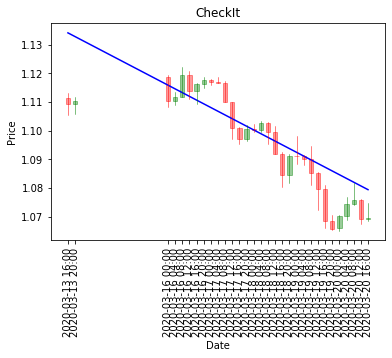

In [4]:
candles_draw(H4)

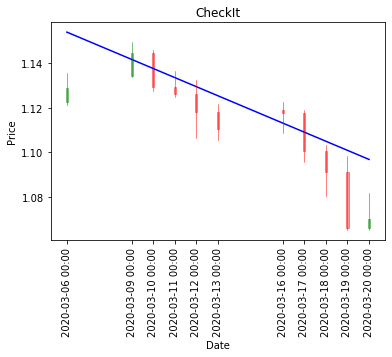

In [5]:
candles_draw(D1)